In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from decision_tree import Tree
from datasets import *
from fitness import *
from ls import ls_first_improvement
from visual_utils import *
from perturbs import *

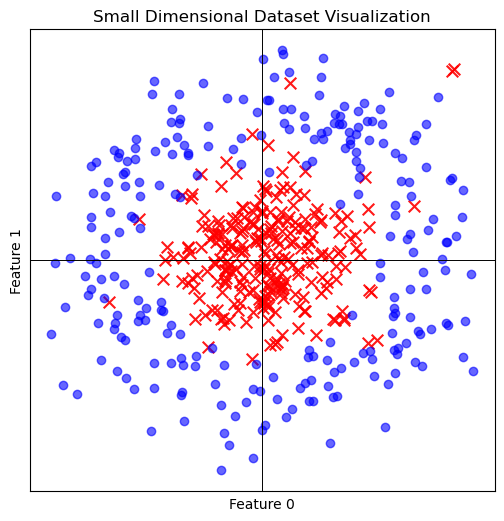

In [8]:
dataset_dict = generate_small_dataset()
visualize_small_dataset(dataset_dict["data"], dataset_dict["labels"])

# dataset_dict = generate_multidimensional_dataset()
# visualize_multidimensional_dataset(dataset_dict["data"], dataset_dict["labels"])

fitness_fn_1 = lambda tree: fitness(tree, dataset_dict)

alt_dataset_dict = generate_small_dataset(n_samples=2000, random_seed=1101)
fitness_fn_2 = lambda tree: fitness(tree, alt_dataset_dict)

In [ ]:
perturbation = lambda tree: combined_perturb(
    tree,
    feature_bounds=dataset_dict["feature_bounds"],
    prob_value=0.05,  # change value by a small step
    prob_add=0.06,  # expand leaf
    prob_prune=0.01, #prune somewhere
)
# perturbation = lambda tree: randomly_grow(
#     tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.03
# )


fitness_fn = fitness_fn_1

init_fn = "clever"
# "basic"
# "coinflip"
# "clever"

# init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
max_evals = 10_000
trials = 50

fitness_list = []
alt_fitness_list = []
sizes = []
for trial in range(trials):

    results = ls_first_improvement(
        fitness_fn=fitness_fn,
        perturbation_fn=perturbation,
        initialisation_fn=init_fn,
        stop_cond=max_evals,
        one_step_max=500,
        p_add=0.7,
        max_depth=3,
        feature_bounds=dataset_dict["feature_bounds"],
    )

    fitness_list.append(results["best_fitness"])
    sizes.append(results["best_tree"].size())
    alt_fitness_list.append(fitness_fn_2(results["best_tree"]))

fitness_list = np.array(fitness_list)
sizes = np.array(sizes)

print("fitness: ")
print(np.mean(fitness_list), np.std(fitness_list))
print(fitness_list)

print("alt fitness: (test data)")
print(np.mean(alt_fitness_list), np.std(alt_fitness_list))
print(alt_fitness_list)

print("sizes: ")
print(np.mean(sizes), np.std(sizes))
print(sizes)

In [ ]:
# perturbation = lambda tree: randomly_grow(
#     tree, feature_bounds=dataset_dict["feature_bounds"], prob_add=0.03
# )
results = ls_first_improvement(
        fitness_fn=fitness_fn,
        perturbation_fn=perturbation,
        initialisation_fn=init_fn,
        stop_cond=max_evals,
        one_step_max=500,
        feature_bounds=dataset_dict["feature_bounds"],
    )

best_tree = results["best_tree"]
visualise_tree_decision(best_tree, dataset_dict)
best = results["best_fitness"]
print("best fitness: ",best)
# best_tree.print_tree_traverse()

history = results["history"]
evolving_fitnesses = [iteration["fitness"] for iteration in history]
simple_graph(
    evolving_fitnesses,
    "Step",
    "Fitness",
    f"Evolving best fitness in each step (improving or restarting)",
)

print(best_tree.size())

train_fitness = results["all_fitnesses"]
test_fitness = [fitness_fn_2(instance) for instance in results["all_solutions"]]
plt.plot(
    population_size * (np.arange(len(train_fitness)) + 1),
    train_fitness,
    label="Train Fitness",
    color="blue",
)
plt.plot(
    population_size * (np.arange(len(test_fitness)) + 1),
    test_fitness,
    label="Test Fitness",
    color="red",
)
plt.xlabel("Iteration Number")
plt.ylabel("Fitness")
plt.title("Train vs Test Fitness over Iterations in LS")
plt.legend()
plt.show()